<a href="https://colab.research.google.com/github/ezzaddeentru/notebooks/blob/main/01_deep_learning_with_pytorch_book_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from torchvision import models

In [5]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [2]:
try:
    from torchinfo import summary
except:
    !pip install torchinfo
    from torchinfo import summary

## img classification

In [6]:
alexnet = models.AlexNet()
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [15]:
summary(alexnet,
        input_size=(1, 3, 224, 224),  # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "kernel_size", "mult_adds"],
        col_width=20)

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Kernel Shape         Mult-Adds
AlexNet                                  [1, 3, 224, 224]     [1, 1000]            --                   --                   --
├─Sequential: 1-1                        [1, 3, 224, 224]     [1, 256, 6, 6]       --                   --                   --
│    └─Conv2d: 2-1                       [1, 3, 224, 224]     [1, 64, 55, 55]      23,296               [11, 11]             70,470,400
│    └─ReLU: 2-2                         [1, 64, 55, 55]      [1, 64, 55, 55]      --                   --                   --
│    └─MaxPool2d: 2-3                    [1, 64, 55, 55]      [1, 64, 27, 27]      --                   3                    --
│    └─Conv2d: 2-4                       [1, 64, 27, 27]      [1, 192, 27, 27]     307,392              [5, 5]               224,088,768
│    └─ReLU: 2-5                         [1, 192, 27, 27]     [1, 192, 27, 27]  

In [17]:
resnet_101_weights = models.ResNet101_Weights.DEFAULT
resnet_101_transforms = resnet_101_weights.transforms()
resnet_101 = models.resnet101(weights=resnet_101_weights)

summary(resnet_101,
        input_size=(1, 3, 224, 224),  # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "kernel_size", "mult_adds"],
        col_width=20)

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Kernel Shape         Mult-Adds
ResNet                                   [1, 3, 224, 224]     [1, 1000]            --                   --                   --
├─Conv2d: 1-1                            [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                [7, 7]               118,013,952
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]    [1, 64, 112, 112]    128                  --                   128
├─ReLU: 1-3                              [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --                   --
├─MaxPool2d: 1-4                         [1, 64, 112, 112]    [1, 64, 56, 56]      --                   3                    --
├─Sequential: 1-5                        [1, 64, 56, 56]      [1, 256, 56, 56]     --                   --                   --
│    └─Bottleneck: 2-1                   [1, 64, 56, 56]      [1, 256, 56, 56]     --  

In [18]:
resnet_101_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

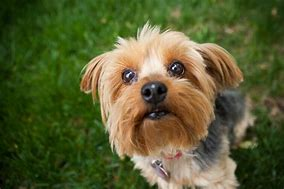

In [21]:
# prompt: open image: https://th.bing.com/th/id/OIP.U4a05VxpJ-AJkyZrBKcutgHaE8?w=284&h=189&c=7&r=0&o=5&pid=1.7

from PIL import Image
import requests
from io import BytesIO

def open_image_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    image = Image.open(BytesIO(response.content))
    return image

img = open_image_from_url('https://th.bing.com/th/id/OIP.U4a05VxpJ-AJkyZrBKcutgHaE8?w=284&h=189&c=7&r=0&o=5&pid=1.7')
img


In [23]:
img_t = resnet_101_transforms(img)
img_t

tensor([[[-1.3815, -1.3815, -1.3644,  ..., -0.7993, -0.8678, -0.9363],
         [-1.3644, -1.3644, -1.3473,  ..., -0.7822, -0.8335, -0.8849],
         [-1.3815, -1.3815, -1.3644,  ..., -0.7822, -0.8335, -0.8678],
         ...,
         [-1.7754, -1.7754, -1.7754,  ...,  1.3070,  1.1529,  1.0673],
         [-1.8782, -1.8782, -1.8097,  ...,  0.9474,  0.9646,  0.9646],
         [-1.8439, -1.7925, -1.6898,  ...,  0.7762,  0.6563,  0.6049]],

        [[-0.7577, -0.7577, -0.7402,  ..., -0.1975, -0.2500, -0.3200],
         [-0.7227, -0.7227, -0.7052,  ..., -0.1800, -0.2150, -0.2675],
         [-0.7402, -0.7402, -0.7227,  ..., -0.1800, -0.2150, -0.2500],
         ...,
         [-1.3354, -1.3529, -1.3529,  ...,  1.1155,  0.9930,  0.9230],
         [-1.4405, -1.4405, -1.3880,  ...,  0.7479,  0.8004,  0.8179],
         [-1.4055, -1.3704, -1.2654,  ...,  0.5728,  0.4853,  0.4503]],

        [[-1.4733, -1.4733, -1.4559,  ..., -0.9853, -1.0376, -1.1073],
         [-1.4907, -1.4907, -1.4733,  ..., -0

In [24]:
img_t.shape

torch.Size([3, 224, 224])

In [27]:
resnet_101.eval()
output = resnet_101(img_t.unsqueeze(0))
output.shape

torch.Size([1, 1000])

In [36]:
output.max()

tensor(8.1584, grad_fn=<MaxBackward1>)

In [37]:
sum(output.flatten())

tensor(-0.0569, grad_fn=<AddBackward0>)

In [43]:
from torch import nn
pred_prob = nn.functional.softmax(output, dim=1)
pred_prob.sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [44]:
pred_prob.max()

tensor(0.7250, grad_fn=<MaxBackward1>)

In [28]:
pred_label = pred_prob.argmax(dim=1)
pred_label

tensor([187])

In [33]:
resnet_classes = resnet_101_weights.meta["categories"]
len(resnet_classes)

1000

In [35]:
pred_class = resnet_classes[pred_label]
pred_class  # correct

'Yorkshire terrier'

In [49]:
# Ensure imports are correct
import torch
import torch.nn as nn

# Set the model to evaluation mode
resnet_101.eval()

# Forward pass
output = resnet_101(img_t.unsqueeze(0))

# Apply softmax to get probabilities
pred_prob = nn.functional.softmax(output, dim=1)

# Get the predicted label index
pred_label = pred_prob.argmax(dim=1).item()

# Get the confidence (probability of the predicted class)
confidence = pred_prob[0, pred_label].item()

# Map the label index to the corresponding class name
pred_class = resnet_classes[pred_label]

# Print results
print(f"Predicted Class: {pred_class} (Confidence: {confidence:.4f})")

Predicted Class: Yorkshire terrier (Confidence: 0.7250)


In [50]:
pred_label, pred_class, pred_prob.max()

(187, 'Yorkshire terrier', tensor(0.7250, grad_fn=<MaxBackward1>))

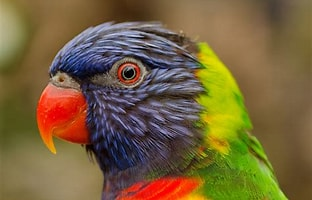

In [51]:
img2 = open_image_from_url('https://www.bing.com/th?id=OIP.mqzAFZ1YyINOO60dQVu9XAHaE5&w=312&h=200&c=8&rs=1&qlt=90&o=6&pid=3.1&rm=2')
img2

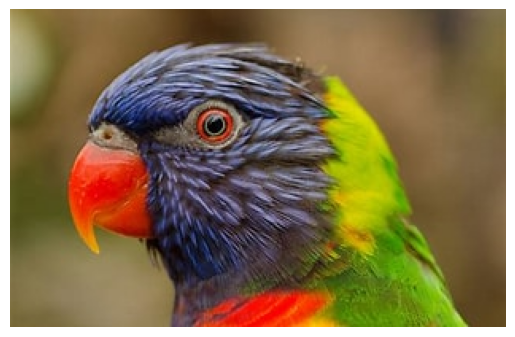

In [55]:
import matplotlib.pyplot as plt

img2_t = resnet_101_transforms(img2)
plt.imshow(img2)
plt.axis('off')  # Hide the axes
plt.show()

In [56]:
resnet_101.eval()


logits = resnet_101(img2_t.unsqueeze(0))
pred_prob = nn.functional.softmax(logits, dim=1)
pred_label = pred_prob.argmax(dim=1).item()
pred_class = resnet_classes[pred_label]  # correct

print(f"Predicted Class: {pred_class} (Confidence: {pred_prob[0, pred_label].item():.4f})")

Predicted Class: lorikeet (Confidence: 0.8888)


In [57]:
# prompt: return top 5 prob with their labels

# Find the top 5 probabilities and their corresponding labels
top5_prob, top5_catid = torch.topk(pred_prob, 5)

# Print the top 5 predictions
for i in range(top5_prob.size(1)):
    print(f"{i+1}: {resnet_classes[top5_catid[0, i]]} ({top5_prob[0, i].item():.4f})")


1: lorikeet (0.8888)
2: macaw (0.0004)
3: sulphur-crested cockatoo (0.0003)
4: bee eater (0.0002)
5: potter's wheel (0.0002)


In [61]:
_, indices = torch.sort(logits, descending=True)
indices[0, :5]

tensor([ 90,  88,  89,  92, 739])

In [64]:
[(resnet_classes[idx], round(pred_prob[0, idx].item()*100, 3)) for idx in indices[0, :5]]

[('lorikeet', 88.879),
 ('macaw', 0.039),
 ('sulphur-crested cockatoo', 0.032),
 ('bee eater', 0.021),
 ("potter's wheel", 0.02)]

## torch.hub

In [65]:
from torch import hub

In [68]:
resnet101_model = hub.load('pytorch/vision:v0.10.0', 'resnet101', weights=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 72.5MB/s]


In [69]:
summary(resnet101_model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  4,096
│    │    └─BatchNorm2d: 3-2             128
│    │    └─Conv2d: 3-3                  36,864
│    │    └─BatchNorm2d: 3-4             128
│    │    └─Conv2d: 3-5                  16,384
│    │    └─BatchNorm2d: 3-6             512
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              16,896
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  16,384
│    │    └─BatchNorm2d: 3-10            128
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            128
│    │    └─Conv2d: 3-13               